## Hyperparameter tuning of Optimizer in Neural Network and obtaining the results of best optimizer

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [0]:
num_classes = 10
data_augmentation = True
num_predictions = 20
# batch_size = 128
# epochs = 30

In [0]:
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_cifar10_trained_model.h5'

### Load the data

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### Convert the image data into required format

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Create a neural network for classifying CIFAR dataset

In [0]:
def model1(model,batch_size,epochs,optimizer):
    
        model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        if(optimizer == 'rms'):
            opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
        if(optimizer == 'adam'):
            opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
        if(optimizer == 'sgd'):
            opt = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
        if(optimizer == 'adagrad'):
             opt =  keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
        if(optimizer == 'adadelta'):
               opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
        if(optimizer == 'adamax'):
               opt = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
        if(optimizer == 'nadam'):
                opt = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

### Train the model by tuning the Optimizer

#### RMSprop Optimizer

In [0]:
tmodel1 = Sequential()
train_model1 = model1(tmodel1,128,40,'rms')

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 369s 7ms/step - loss: 1.9799 - acc: 0.2720 - val_loss: 1.7393 - val_acc: 0.3872
Epoch 2/40
50000/50000 [==============================] - 406s 8ms/step - loss: 1.6895 - acc: 0.3882 - val_loss: 1.5718 - val_acc: 0.4303
Epoch 3/40
50000/50000 [==============================] - 456s 9ms/step - loss: 1.5672 - acc: 0.4311 - val_loss: 1.5003 - val_acc: 0.4711
Epoch 4/40
50000/50000 [==============================] - 461s 9ms/step - loss: 1.4710 - acc: 0.4699 - val_loss: 1.3519 - val_acc: 0.5149
Epoch 5/40
50000/50000 [==============================] - 458s 9ms/step - loss: 1.4002 - acc: 0.4979 - val_loss: 1.3086 - val_acc: 0.5319
Epoch 6/40
50000/50000 [==============================] - 455s 9ms/step - loss: 1.3456 - acc: 0.5185 - val_loss: 1.2510 - val_acc: 0.5562
Epoch 7/40
50000/50000 [==============================] - 452s 9ms/step - loss: 1.2964 - acc: 0.5373 - val_loss: 1.2288 - 

In [0]:
# summarize history for accuracy
plt.plot(tmodel1.history['acc'])
plt.plot(tmodel1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(tmodel1.history['loss'])
plt.plot(tmodel1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

#### Adam Optimizer

In [7]:
tmodel2 = Sequential()
train_model2 = model1(tmodel2,128,40,'adam')

W0720 08:36:14.939845 139729649719168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 08:36:14.983927 139729649719168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 08:36:14.992692 139729649719168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 08:36:15.062439 139729649719168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0720 08:36:15.066233 139729649719168 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 254s 5ms/step - loss: 1.9334 - acc: 0.2900 - val_loss: 1.6449 - val_acc: 0.4074
Epoch 2/40
50000/50000 [==============================] - 254s 5ms/step - loss: 1.6175 - acc: 0.4101 - val_loss: 1.4761 - val_acc: 0.4655
Epoch 3/40
50000/50000 [==============================] - 252s 5ms/step - loss: 1.4825 - acc: 0.4594 - val_loss: 1.3609 - val_acc: 0.5095
Epoch 4/40
50000/50000 [==============================] - 253s 5ms/step - loss: 1.3962 - acc: 0.4948 - val_loss: 1.2904 - val_acc: 0.5409
Epoch 5/40
50000/50000 [==============================] - 250s 5ms/step - loss: 1.3295 - acc: 0.5223 - val_loss: 1.2294 - val_acc: 0.5660
Epoch 6/40
50000/50000 [==============================] - 251s 5ms/step - loss: 1.2793 - acc: 0.5445 - val_loss: 1.1909 - val_acc: 0.5759
Epoch 7/40
50000/50000 [==============================] - 251s 5ms/step - loss: 1.2336 - acc: 0.5621 - val_loss: 1.1484 - 

In [0]:
# train_model2

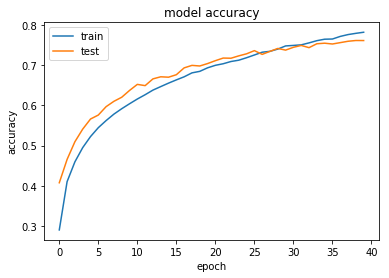

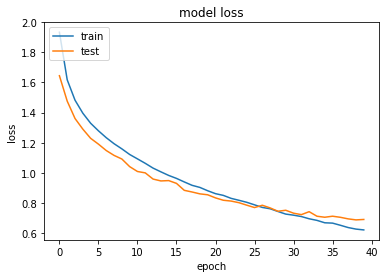

In [9]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(train_model2.history['acc'])
plt.plot(train_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model2.history['loss'])
plt.plot(train_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Stochastic Gradient Descent optimizer

In [0]:
tmodel3 = Sequential()
train_model3 = model1(tmodel3,128,40,'sgd')

W0628 07:54:22.321609 139714845165440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 07:54:22.343479 139714845165440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 07:54:22.420454 139714845165440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 07:54:22.424273 139714845165440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0628 07:54:22.438910 139714845165440 de

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 238s 5ms/step - loss: 2.2486 - acc: 0.1511 - val_loss: 2.1181 - val_acc: 0.2535
Epoch 2/40
50000/50000 [==============================] - 443s 9ms/step - loss: 2.0584 - acc: 0.2405 - val_loss: 1.9587 - val_acc: 0.2897
Epoch 3/40
50000/50000 [==============================] - 468s 9ms/step - loss: 1.9850 - acc: 0.2781 - val_loss: 2.0010 - val_acc: 0.2870
Epoch 4/40
50000/50000 [==============================] - 470s 9ms/step - loss: 1.8959 - acc: 0.3151 - val_loss: 1.7545 - val_acc: 0.3850
Epoch 5/40
50000/50000 [==============================] - 469s 9ms/step - loss: 1.7900 - acc: 0.3507 - val_loss: 1.6533 - val_acc: 0.4058
Epoch 6/40
50000/50000 [==============================] - 471s 9ms/step - loss: 1.7158 - acc: 0.3740 - val_loss: 1.6056 - val_acc: 0.4177
Epoch 7/40
50000/50000 [==============================] - 470s 9ms/step - loss: 1.6628 - acc: 0.3940 - val_loss: 1.5482 - 

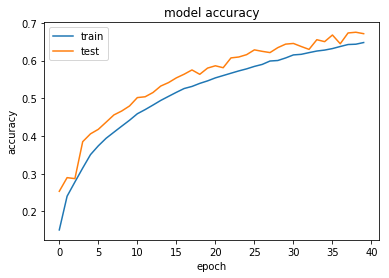

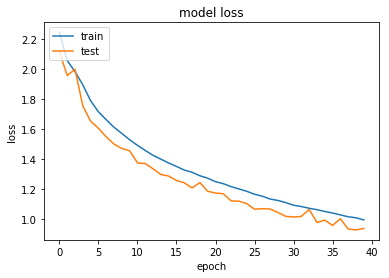

In [0]:
# summarize history for accuracy
plt.plot(train_model3.history['acc'])
plt.plot(train_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model3.history['loss'])
plt.plot(train_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Adagrad Optimizer

In [0]:
tmodel4 = Sequential()
train_model4 = model1(tmodel4,32,40,'adagrad')

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 515s 10ms/step - loss: 14.5000 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/40
50000/50000 [==============================] - 523s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/40
50000/50000 [==============================] - 521s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/40
50000/50000 [==============================] - 509s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/40
50000/50000 [==============================] - 521s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/40
50000/50000 [==============================] - 521s 10ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/40
50000/50000 [==============================] - 527s 11ms/step - loss: 14.5063 - acc: 0.1000 -

In [0]:
# summarize history for accuracy
plt.plot(train_model4.history['acc'])
plt.plot(train_model4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model4.history['loss'])
plt.plot(train_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Adadelta Optimizer

In [0]:
tmodel5 = Sequential()
train_model5 = model1(tmodel5,32,40,'adadelta')

W0702 08:28:27.366836 140155350448000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 08:28:27.408641 140155350448000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 08:28:27.415416 140155350448000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 08:28:27.471290 140155350448000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 08:28:27.474386 140155350448000 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 273s 5ms/step - loss: 1.6601 - acc: 0.3981 - val_loss: 1.4455 - val_acc: 0.4965
Epoch 2/40
50000/50000 [==============================] - 273s 5ms/step - loss: 1.2456 - acc: 0.5604 - val_loss: 1.1655 - val_acc: 0.5807
Epoch 3/40
50000/50000 [==============================] - 273s 5ms/step - loss: 1.0777 - acc: 0.6253 - val_loss: 0.9235 - val_acc: 0.6800
Epoch 4/40
50000/50000 [==============================] - 272s 5ms/step - loss: 0.9779 - acc: 0.6605 - val_loss: 0.9279 - val_acc: 0.6816
Epoch 5/40
50000/50000 [==============================] - 275s 5ms/step - loss: 0.9079 - acc: 0.6885 - val_loss: 0.8514 - val_acc: 0.7104
Epoch 6/40
50000/50000 [==============================] - 276s 6ms/step - loss: 0.8683 - acc: 0.7026 - val_loss: 0.9475 - val_acc: 0.6870
Epoch 7/40
50000/50000 [==============================] - 275s 5ms/step - loss: 0.8366 - acc: 0.7124 - val_loss: 0.7919 - 

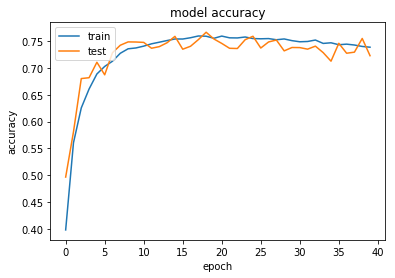

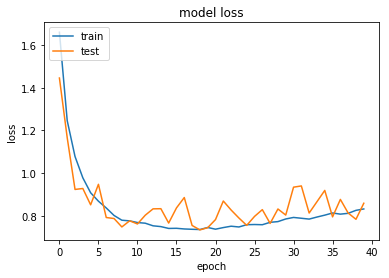

In [0]:
# summarize history for accuracy
plt.plot(train_model5.history['acc'])
plt.plot(train_model5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model5.history['loss'])
plt.plot(train_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Adamax Optimizer

In [0]:
tmodel6 = Sequential()
train_model6 = model1(tmodel6,32,40,'adamax')

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 286s 6ms/step - loss: 1.5489 - acc: 0.4336 - val_loss: 1.2446 - val_acc: 0.5719
Epoch 2/40
50000/50000 [==============================] - 286s 6ms/step - loss: 1.1525 - acc: 0.5917 - val_loss: 0.9645 - val_acc: 0.6662
Epoch 3/40
50000/50000 [==============================] - 273s 5ms/step - loss: 0.9803 - acc: 0.6549 - val_loss: 0.8665 - val_acc: 0.6933
Epoch 4/40
50000/50000 [==============================] - 274s 5ms/step - loss: 0.8635 - acc: 0.6957 - val_loss: 0.8460 - val_acc: 0.7091
Epoch 5/40
50000/50000 [==============================] - 274s 5ms/step - loss: 0.7942 - acc: 0.7216 - val_loss: 0.7384 - val_acc: 0.7443
Epoch 6/40
50000/50000 [==============================] - 274s 5ms/step - loss: 0.7272 - acc: 0.7450 - val_loss: 0.7304 - val_acc: 0.7467
Epoch 7/40
50000/50000 [==============================] - 275s 6ms/step - loss: 0.6883 - acc: 0.7593 - val_loss: 0.6783 - 

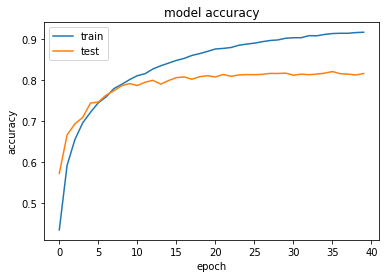

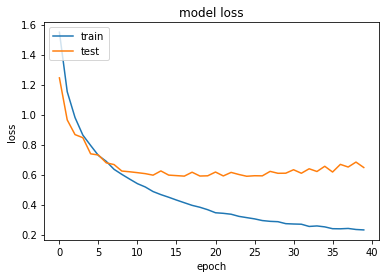

In [0]:
# summarize history for accuracy
plt.plot(train_model6.history['acc'])
plt.plot(train_model6.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model6.history['loss'])
plt.plot(train_model6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Nadam Optimizer

In [0]:
tmodel7 = Sequential()
train_model7 = model1(tmodel7,32,40,'nadam')

W0703 05:22:55.750492 139987120527232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 05:22:55.802982 139987120527232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 05:22:55.813268 139987120527232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 05:22:55.878073 139987120527232 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0703 05:22:55.881366 139987120527232 deprecation_wrapp

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 464s 9ms/step - loss: 4.7652 - acc: 0.1012 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/40
50000/50000 [==============================] - 557s 11ms/step - loss: 14.5034 - acc: 0.1002 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/40
50000/50000 [==============================] - 558s 11ms/step - loss: 14.5073 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/40
50000/50000 [==============================] - 562s 11ms/step - loss: 14.5073 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/40
50000/50000 [==============================] - 565s 11ms/step - loss: 14.5047 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/40
50000/50000 [==============================] - 554s 11ms/step - loss: 14.5047 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/40
50000/50000 [==============================] - 530s 11ms/step - loss: 14.5069 - acc: 0.1000 - v

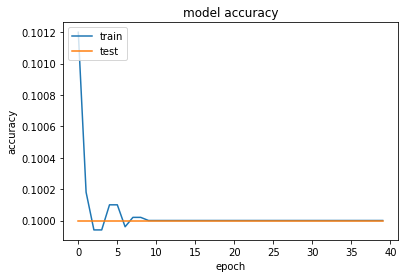

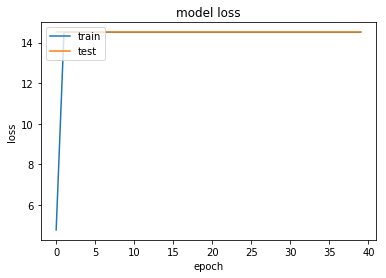

In [0]:
# summarize history for accuracy
plt.plot(train_model7.history['acc'])
plt.plot(train_model7.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model7.history['loss'])
plt.plot(train_model7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()